<a href="https://colab.research.google.com/github/beatricexc/DS-Practice-3/blob/main/DS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV files (e.g pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns # visualisation tool 


###**Lambda Function**

The faster way of writing a function

In [19]:
# lambda function

square = lambda x : x**2      # where x is the name of the argument 
print(square(4))
tot = lambda x, y, z: x+y+z   # where x, y, z are the names of the arguments 
print(tot(1,2,3))

16
6


## Anonymous Function
It is similar to the lambda function but it can take more than one arguments
 - map(func,seq) : applies a function to all the items in a list 

In [20]:
number_list = [1, 2, 3]
y = map(lambda x : x**2, number_list)
print(list(y))

[1, 4, 9]


## Iterators 
- objects that allow you to traverse through all the elements of a collection and return one element at a time 
 - iterator = an object that contains a countable number of elements that can be iterated upon

In [23]:
# iteration example
name = "Gloria"
it = iter(name)
print(next(it)) # print next iteration
print(*it)

G
l o r i a


zip(): zip lists
- The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.

In [24]:
# zip example
list1 = [1,2,3,4]
list2 = [5,6,7,8]
z = zip(list1, list2)
print(z)
z_list = list(z)
print(z_list)

[(1, 5), (2, 6), (3, 7), (4, 8)]


In [25]:
languages  = ['Java', 'Python', 'C++']
versions = [14, 3, 20]
result = zip(languages, versions)
print(list(result))

[('Java', 14), ('Python', 3), ('C++', 20)]


In [26]:
un_zip = zip(*z_list )
un_list1,un_list2 = list(un_zip) #unzip returns tuple
print(un_list1)
print(un_list2)
print(type(un_list2))

(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>


## List Comprehension

Suppose we want to separate the letters of the word "fast" and add the letters as items of a list.
 -- can be done with "for loops" as below but!

In [32]:
h_letters = []

for letter in 'fast':
  h_letters.append(letter)
print(h_letters)

['f', 'a', 's', 't']


We can get this result with something easier called : list comprehension
List comprehension is an elegant way to define and create lists based on existing lists

In [35]:
h_letters = [letter for letter in 'fast']
print(h_letters)

['f', 'a', 's', 't']


In the above example, a new list is assigned to variable h_letters, and the list contains the items of the iterable string 'fast'. 

We call print() function to receive the output.

### Conditionals in List Comprehension
 with mathematical operators, integers and range()

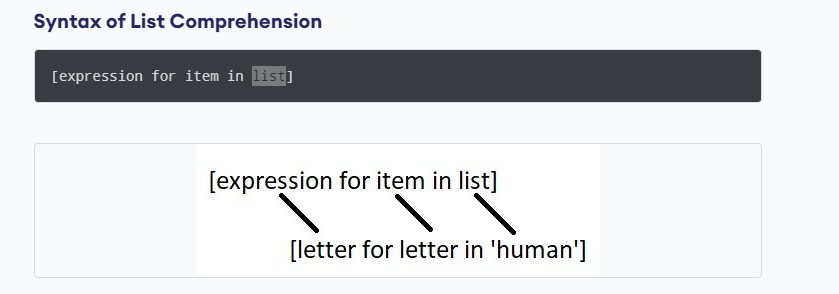

In [36]:
number_list = [x for x in range(20) if x % 2 == 0]
print(number_list)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


Nested If with List Comprehension 

In [38]:
num_list = [y for y in range(100) if y % 2 == 0 if y % 5 == 0]
print(num_list)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


If...else with list comprehension 

In [39]:
obj = ["Even" if i % 2 == 0 else "Odd" for i in range(10)]
print(obj)

['Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd']


In [40]:
# returning pokemon csv and making one more list comprehension example
# we will clasify pokemons based on high vs low speed. The threshold will be average speed

treshold = sum(data.Speed)/len(data.Speed)
data["speed_level"] = ["high" if i > treshold else "low" for i in data.Speed]
data.loc[:10, ["speed_level", "Speed"]]

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


###3. Cleaning Data

We need to diagnose and clean data before exploring.
Unclean data:

Column name inconsistency like upper
-lower case letter or space between words
- missing data
- different language

We will use head, tail, columns, shape and info methods to diagnose data

In [41]:
data = pd.read_csv('/content/drive/MyDrive/pokemon.csv')
data.head() #returns first 5 rows

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [42]:
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [44]:
# columns returns the names of the features
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [45]:
data.shape # returns the number of rows and columns in the table

(800, 12)

In [46]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB
